In [2]:
%matplotlib inline

from pixie4e import * # import our python module generated by kaitai struct
import matplotlib.pyplot as plt # plotting modules
import random


# Opens a handle to read the binary data file
# !!!! Edit the file path to point to your local StilbeneAmCs_500_0253.b00 file !!!!
pixie_data = Pixie4e.from_file(r"C:\Users\gedvilab\detectorLab\xia\data\StilbeneAmCs_500_0253\StilbeneAmCs_500_0253.b00")

# NOTE - because of how the footer is generated in the file, the schema can't yet switch on the
# event header and read the footer in correctly. As a result the footer gets read in as one extra
# 0-energy event. As such, while looping through we need to avoid the last element in the array of
# events
# for event in pixie_data.events[:-1]:
#     print(event.header.timestamp_full)


In [3]:
psa = []
energies = []

# Populate arrays with the psa and energy values from the binary file
for event in pixie_data.events[:-1]:
    psa.append(event.header.user_psa_value)
    energies.append(event.header.energy)

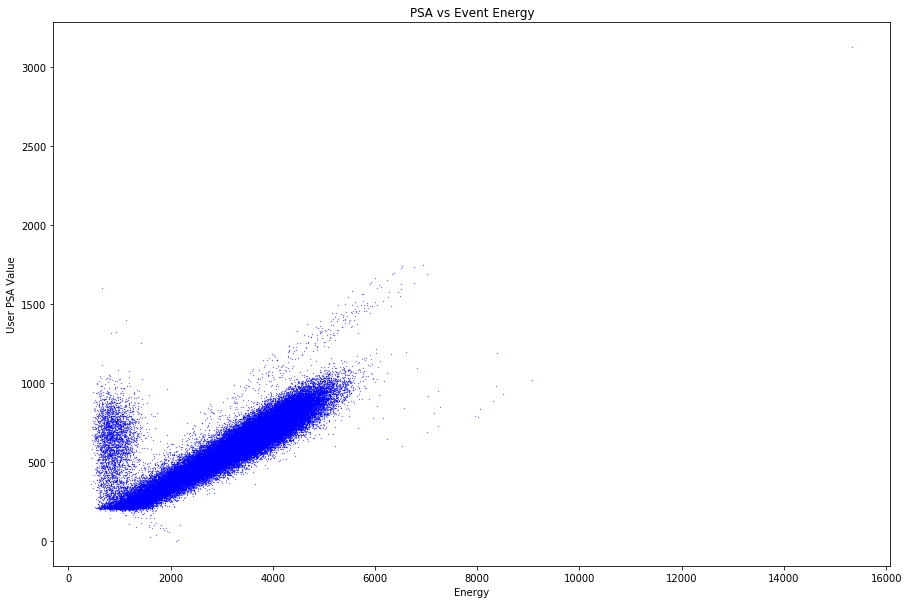

In [7]:
plt.figure(figsize=(15,10))
plt.scatter(energies, psa, marker='o', s=0.05, color='b')
plt.xlabel('Energy')
plt.ylabel('User PSA Value')
plt.title('PSA vs Event Energy')
plt.show()


Event Number: 40279


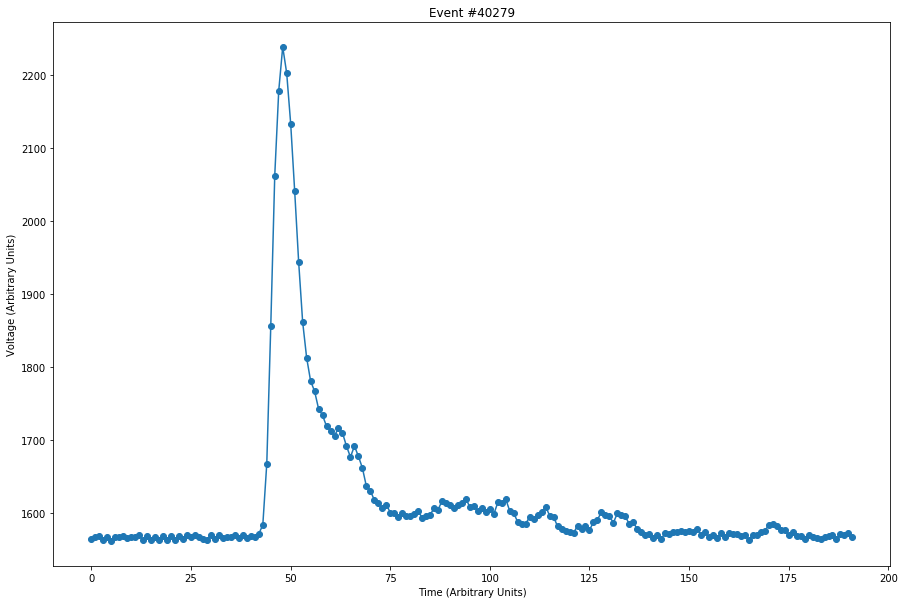

In [11]:
# Plot a random pulse from the file
event_number = random.randint(0, 50000)
print("Event Number: " + str(event_number))
event_random = pixie_data.events[event_number]
pulse = event_random.data
plt.figure(figsize=(15,10))
plt.title("Event #" + str(event_number))
plt.xlabel("Time (Arbitrary Units)")
plt.ylabel("Voltage (Arbitrary Units)")
plt.plot(pulse, '-o')